<a href="https://colab.research.google.com/github/somu-som/POLLUTION-MEASUREMENT/blob/main/pollution_measurement0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pollution Measurement from Road Side Plant Leaf **


In [ ]:
#import library 
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [ ]:
#Deep Learning or CNN
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,ZeroPadding2D,Dropout,Activation

In [ ]:
#Image Augmentation and Regeneration

from keras.preprocessing.image import ImageDataGenerator,load_img

In [ ]:
#print directory folder of datasets
print(os.listdir('/content/drive/MyDrive/Datasets'))

['test_data', 'train_data', 'val_data']


In [ ]:
#Train & Test folder
train_folder='/content/drive/MyDrive/Datasets/train_data/'
test_folder='/content/drive/MyDrive/Datasets/test_data'
train_n=train_folder+'normal_image/'
train_d=train_folder+'Dust_image/'

In [ ]:
#Load and display the images belongs to these folders
D_image=Image.open(train_d+'1642142641562.jpg')
N_image=Image.open(train_n+'1642142641111.jpg')
P_image=Image.open(train_n+'IMG_20220105_161155.jpg')

Text(0.5, 1.0, 'image')

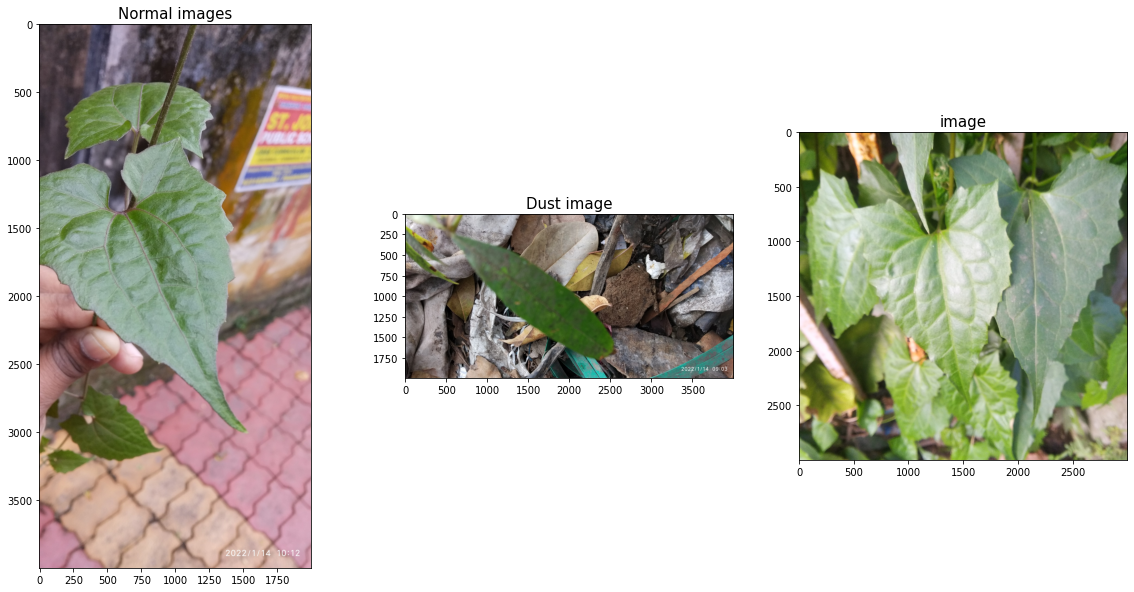

In [ ]:
#Plot the images
fig=plt.figure(figsize=(20,10))
a1=fig.add_subplot(1,3,1)
img_plot=plt.imshow(N_image,cmap='summer')
a1.set_title('Normal images',fontsize=15)
a1=fig.add_subplot(1,3,2)
img_plot=plt.imshow(D_image,cmap='summer')
a1.set_title('Dust image',fontsize=15)
a1=fig.add_subplot(1,3,3)
img_plot=plt.imshow(P_image,cmap='gray')
a1.set_title('image',fontsize=15)

In [ ]:
train_folder='/content/drive/MyDrive/Datasets/train_data'
test_folder='/content/drive/MyDrive/Datasets/test_data'
val_folder='/content/drive/MyDrive/Datasets/val_data'

In [ ]:
#Data Augmentation:- Create some new data
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,rotation_range=40,width_shift_range=0.4,height_shift_range=0.2)
test_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,)
train_set=train_datagen.flow_from_directory(train_folder,target_size=(226,226),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory(test_folder,target_size=(226,226),batch_size=32,class_mode='categorical')
val_set=test_datagen.flow_from_directory(val_folder,target_size=(226,226),batch_size=32,class_mode='categorical')

Found 393 images belonging to 2 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [ ]:
# model using adam optimizers
from tensorflow.keras.optimizers import Adam

In [ ]:
#train model
#Sequential Model
def build_model():
  model=Sequential()
  #layer-1
  model.add(ZeroPadding2D((1),input_shape=train_set.image_shape))
  model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  #Layer-2
  model.add(ZeroPadding2D(1))
  model.add(Activation('relu'))
  model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  #Layer-3
  model.add(ZeroPadding2D(1))
  model.add(Activation('relu'))
  model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  #Layer-4
  model.add(ZeroPadding2D(1))
  model.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  #Flatten the data
  model.add(Flatten())

  #FC
  model.add(Dense(units=256,activation='relu'))

  #Dropout
  model.add(Dropout(0.20))

  #output layer
  model.add(Dense(units=10,activation='softmax'))

  adam_optimizer=Adam(learning_rate=0.0001)
  model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=adam_optimizer)
  return model

In [ ]:
model=build_model()

In [ ]:
#Model summary representation
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 228, 228, 3)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 226, 226, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 113, 113, 64)     0         
 )                                                               
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 115, 115, 64)     0         
 ng2D)                                                           
                                                                 
 activation (Activation)     (None, 115, 115, 64)      0         
                                                        

In [ ]:
#history of model
history=model.fit_generator(epochs=8,shuffle=True,validation_data=val_set,generator=train_set,steps_per_epoch=300)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/8


InvalidArgumentError: ignored